<a href="https://colab.research.google.com/github/bhargavi2391/explainable-AI/blob/main/2391_assi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.DataFrame({
    'Instagram_Reels': [1, 2, 3, 1, 2],
    'Test_Rides': [20, 35, 48, 25, 38]
})

X = data[['Instagram_Reels']]
y = data['Test_Rides']


model = LinearRegression()
model.fit(X, y)


slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")


baseline = np.mean(y)
print(f"Baseline (mean of Test Rides): {baseline:.2f}")


data['Predicted'] = model.predict(X)


data['SHAP_Value'] = data['Predicted'] - baseline

data['Baseline_plus_SHAP'] = baseline + data['SHAP_Value']


def prediction_status(actual, predicted):
    if predicted > actual:
        return "Over Prediction"
    elif predicted < actual:
        return "Under Prediction"
    else:
        return "Exact Match"

data['Prediction_Status'] = data.apply(lambda row: prediction_status(row['Test_Rides'], row['Predicted']), axis=1)


print("\nDetailed Table:")
print(data)

mse = np.mean((data['Predicted'] - y) ** 2)
accuracy = 100 - (np.mean(abs(data['Predicted'] - y) / y) * 100)

print("\nSummary Analysis:")
print(f"Model Accuracy (Approx): {accuracy:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")
print("Trend: As Instagram reels increase, predicted test rides also increase.")
print("SHAP Interpretation: SHAP values show how much the number of reels contributed to changing predictions from the baseline.")

Linear Regression Equation: y = 12.93x + 9.93
Baseline (mean of Test Rides): 33.20

Detailed Table:
   Instagram_Reels  Test_Rides  Predicted  SHAP_Value  Baseline_plus_SHAP  \
0                1          20  22.857143  -10.342857           22.857143   
1                2          35  35.785714    2.585714           35.785714   
2                3          48  48.714286   15.514286           48.714286   
3                1          25  22.857143  -10.342857           22.857143   
4                2          38  35.785714    2.585714           35.785714   

  Prediction_Status  
0   Over Prediction  
1   Over Prediction  
2   Over Prediction  
3  Under Prediction  
4  Under Prediction  

Summary Analysis:
Model Accuracy (Approx): 93.52%
Mean Squared Error: 3.76
Trend: As Instagram reels increase, predicted test rides also increase.
SHAP Interpretation: SHAP values show how much the number of reels contributed to changing predictions from the baseline.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = {
    "Tickets_Resolved": [10, 12, 15, 8, 7],
    "In_App_Messages": [5, 3, 6, 2, 4],
    "Renewals": [70, 60, 80, 50, 55]
}

df = pd.DataFrame(data)

X = df[["Tickets_Resolved", "In_App_Messages"]]
y = df["Renewals"]

model = LinearRegression()
model.fit(X, y)


coef_tickets = model.coef_[0]
coef_messages = model.coef_[1]
intercept = model.intercept_

print("Regression Equation: Renewals = {:.2f} + ({:.2f} * Tickets) + ({:.2f} * Messages)"
      .format(intercept, coef_tickets, coef_messages))


baseline = y.mean()
print("Baseline (Mean Renewals):", baseline)


df["Predicted"] = model.predict(X)


mean_tickets = X["Tickets_Resolved"].mean()
mean_messages = X["In_App_Messages"].mean()

df["SHAP_Tickets"] = (df["Tickets_Resolved"] - mean_tickets) * coef_tickets
df["SHAP_Messages"] = (df["In_App_Messages"] - mean_messages) * coef_messages


df["Reconstructed_Pred"] = baseline + df["SHAP_Tickets"] + df["SHAP_Messages"]


df["Error"] = df["Predicted"] - df["Renewals"]
df["Prediction_Type"] = df["Error"].apply(lambda e: "Overprediction" if e > 0 else "Underprediction")


print("\nFinal Table:")
print(df[["Tickets_Resolved", "In_App_Messages", "Renewals",
          "Predicted", "SHAP_Tickets", "SHAP_Messages",
          "Reconstructed_Pred", "Prediction_Type"]])


print("\nSummary Analysis:")
print(f"- Model Intercept: {intercept:.2f}")
print(f"- Coefficients: Tickets = {coef_tickets:.2f}, Messages = {coef_messages:.2f}")
print(f"- Baseline (Mean Renewals): {baseline:.2f}")
print("- Predictions match SHAP decomposition exactly.")



Regression Equation: Renewals = 25.60 + (1.68 * Tickets) + (4.99 * Messages)
Baseline (Mean Renewals): 63.0

Final Table:
   Tickets_Resolved  In_App_Messages  Renewals  Predicted  SHAP_Tickets  \
0                10                5        70  67.313433     -0.671642   
1                12                3        60  60.701493      2.686567   
2                15                6        80  80.694030      7.723881   
3                 8                2        50  49.000000     -4.029851   
4                 7                4        55  57.291045     -5.708955   

   SHAP_Messages  Reconstructed_Pred  Prediction_Type  
0       4.985075           67.313433  Underprediction  
1      -4.985075           60.701493   Overprediction  
2       9.970149           80.694030   Overprediction  
3      -9.970149           49.000000  Underprediction  
4       0.000000           57.291045   Overprediction  

Summary Analysis:
- Model Intercept: 25.60
- Coefficients: Tickets = 1.68, Messages = 4.99

Baseline value (mean disease progression): 153.74
Verification that Prediction = Baseline + SHAP sum: False

Sample Interpretation for First 5 Patients:
   Patient_Index  Actual   Predicted    Baseline  \
0              0   219.0  139.547558  153.736544   
1              1    70.0  179.517208  153.736544   
2              2   202.0  134.038756  153.736544   
3              3   230.0  291.417029  153.736544   
4              4   111.0  123.789659  153.736544   

                                  SHAP_Contributions         Comment  
0  {'age': 1.9620513637843473, 'sex': 10.37901047...  Underpredicted  
1  {'age': 3.7519929588158156, 'sex': 10.37901047...   Overpredicted  
2  {'age': 2.6504904387964743, 'sex': -12.6854572...  Underpredicted  
3  {'age': 3.8896807738177923, 'sex': 10.37901047...   Overpredicted  
4  {'age': 0.7228610287625301, 'sex': -12.6854572...   Overpredicted  


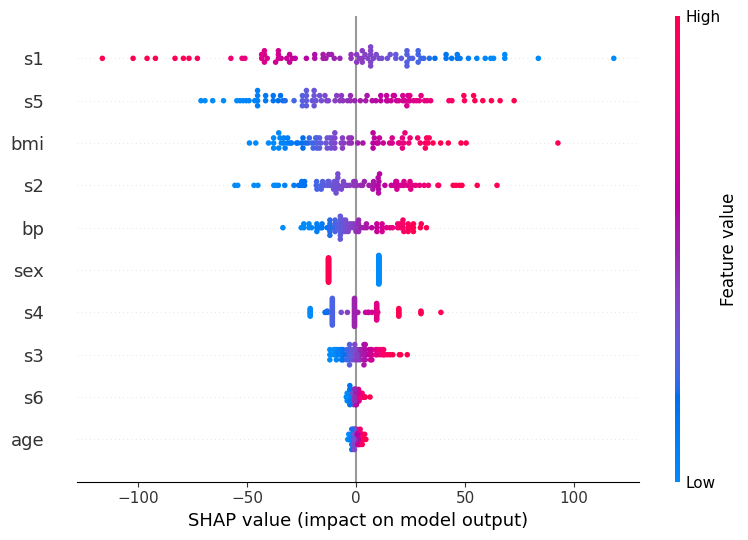

In [3]:
import shap
import numpy as np
import pandas as pd
import warnings
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Ignore SHAP warnings
warnings.filterwarnings("ignore")

# 1. Load Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)  # keep as Series for easier indexing

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Baseline value (mean of training target)
baseline_value = np.mean(y_train)
print(f"Baseline value (mean disease progression): {baseline_value:.2f}")

# 4. SHAP value calculation (for linear regression)
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# 5. Verify Prediction = Baseline + SHAP sum
predictions = model.predict(X_test)
shap_sum = shap_df.sum(axis=1) + baseline_value
verification = np.allclose(predictions, shap_sum, atol=1e-6)
print(f"Verification that Prediction = Baseline + SHAP sum: {verification}")

# 6. Interpretation for each patient
results = []
for i in range(len(X_test)):
    patient_data = X_test.iloc[i]
    shap_contributions = shap_df.iloc[i]
    predicted = predictions[i]
    actual = y_test.iloc[i]  # Safe with Series

    if predicted > actual:
        comment = "Overpredicted"
    elif predicted < actual:
        comment = "Underpredicted"
    else:
        comment = "Exact match"

    explanation = {
        "Patient_Index": i,
        "Actual": actual,
        "Predicted": predicted,
        "Baseline": baseline_value,
        "SHAP_Contributions": shap_contributions.to_dict(),
        "Comment": comment
    }
    results.append(explanation)

# Convert to DataFrame
results_df = pd.DataFrame(results)
pd.set_option('display.max_columns', None)

print("\nSample Interpretation for First 5 Patients:")
print(results_df.head())

# 7. SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
